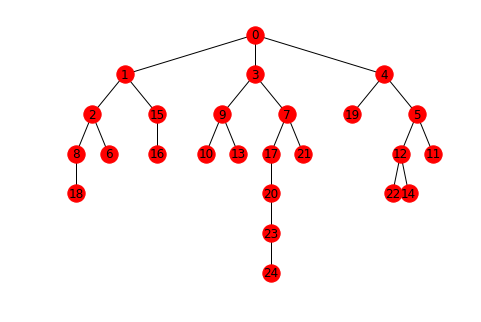

In [2]:
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
import operator
import math
import time
from random import shuffle
%run '/home/diego/Dropbox/Tesis/Models/Pseudo-D-Regular Trees.ipynb'

This file contains all the estimators and nothing more. 

## Leaves Removal

In [4]:
def rem2(G):
    
    n=G.number_of_nodes()
    graph_nodes=list(G.nodes())
    graph_dict={}
    graph={}
    for i in graph_nodes:
        graph_dict[str(i)]={}
        graph[str(i)]=G.degree(i)
        graph_dict[str(i)]=list(G.neighbors(i))
    while n>1:
        leaves=[int(i) for i in graph if graph[i]==1]
        #print 'leaves',leaves
        index=random.choice(range(len(leaves)))
        #print 'index',index,'node',leaves[index]
        graph[str(leaves[index])]=0
        #print 'neig',graph_dict[str(leaves[index])]
        for j in graph_dict[str(leaves[index])]:
            graph[str(j)]=graph[str(j)]-1
        #print 'graph',graph
        #print 'leaves=',leaves
        n=n-1
    leaves.remove(leaves[index])
    #print 'last leaves',leaves
    #print len(leaves)
    #finalvertx=random.choice(leaves)
    #print finalvertx
    return leaves[0]

test=areg(50)
#pos = hierarchy_pos(test,0) 
#nx.draw(test,pos,with_labels=True)

#plt.show()

v=rem2(test) #Checked!
print v

## PageRank

In [5]:

#
#print center
#print pr
#for size in [10,20,30,50,100,200,300,400,500,1000,10000,100000]:
#list_maximum=[]
#####test=areg(size) #this is the code for the pagerank estimator
#####pr=nx.pagerank(test) #...............
#####center=max(pr.iteritems(), key=operator.itemgetter(1))[1] #........... assumed source
#for i in range(size):
        #if pr[i]==center:
         #   list_maximum.append([i,pr[i]])
          #  print list_maximum
           # if len(list_maximum)==1:
            #    print 'true!',size

# [More tests!]
p3r=areg(30)
pr_list=nx.pagerank(p3r)
print pr_list
pr=max(pr_list.iteritems(), key=operator.itemgetter(1))[0]
print pr

## Degree

dc=nx.degree_centrality(p3r)
#print dc
list_maximum=[]
center=max(dc.iteritems(), key=operator.itemgetter(1))[1]
#print 'center',center
for i in range(30):
        if dc[i]==center:
            list_maximum.append([i,dc[i]])
#print list_maximum
pair=random.choice(list_maximum)
#print pair[0]

## Shah-Zaman

In [6]:
def children(Gbfs,v):
    #Gbfs has to be a bfs tree
    #start_time=time.time() #TIME
    child=[]
    for i in Gbfs.edges(v):
        child.append(i[1])
    #final_time= -start_time +time.time()
    #print final_time
    return child

In [7]:
def parent(Gbfs,v):
    #Gbfs has to be a bfs tree
    #start_time=time.time() #TIME
    parent='none'
    edges=list(Gbfs.edges())
    for i,j in edges:
        if j==v:
            parent=i
            return parent
    if parent=='none':
        print 'v is the root'
        
    #final_time1= -start_time +time.time()
    #print final_time1

In [8]:
def t_up(Gbfs,v):
    #start_time=time.time() #TIME
    leaves=[]
    T=1
    nodes=Gbfs.nodes()
    for i in nodes:
        if children(Gbfs,i)==[]:
            leaves.append(i)
    
    if v in leaves:
        T=1
    else:
        child=children(Gbfs,v)
        for j in child:
            T=t_up(Gbfs,j)+T
    #final_time= -start_time +time.time()
    #print final_time
    return T

In [9]:
def p_up(Gbfs,v):
    #start_time=time.time() #TIME
    leaves=[]
    T=1
    nodes=Gbfs.nodes()
    for i in nodes:
        if children(Gbfs,i)==[]:
            leaves.append(i)
    if v in leaves:
        T=1
    else:
        child=children(Gbfs,v)
        for j in child:
            T=T*p_up(Gbfs,j)
        T=T*t_up(Gbfs,v)
    #final_time= -start_time +time.time()
    #print final_time
    return T

In [10]:
def r_down(Gbfs,v,root):
    #rumor centrality of v
    start_time=time.time() #TIME
    leaves=[]
    N=Gbfs.number_of_nodes()
    
    if v==root:
        T=float(1)
        child=children(Gbfs,v)
        for i in child:
            T=T/p_up(Gbfs,i)
        T=T*math.factorial(N-1)
        
    else:
        T=r_down(Gbfs,parent(Gbfs,v),root)*t_up(Gbfs,v)/(N-t_up(Gbfs,v))
    return T

In [11]:
def sz(G):
    nodes=list(G.nodes())
    root=random.choice(nodes)
    #print 'root',root
    Gbfs=nx.bfs_tree(G,root)
    rumor_centralities=[]
    for i in nodes:
        rumor_centralities.append((i,r_down(Gbfs,i,root)))
    rumor_centralities=sorted(rumor_centralities,key=itemgetter(1))
    return rumor_centralities# es el ultimo elemento de la lista (L[len(L)-1]), la primera entrada.  

L=sz(test)

L

test=areg(50)
pos = hierarchy_pos(test,0) 
nx.draw(test,pos,with_labels=True)

plt.show()

v,_=sz(test)
v

## Simple Estimator

In [150]:
def subsize(G,u):
    subtrees_size=[]
    if u in G.nodes():
        Gbfs=nx.bfs_tree(G,u)
        for i in G.nodes():
            if u!=i:
                subtrees_size.append(t_up(Gbfs,i))
        return max(subtrees_size)

In [158]:
def simple(G):
    all_sub=[]
    for v in G.nodes():
        all_sub.append([v,subsize(G,v)])
    all_sub=sorted(all_sub,key=itemgetter(1))
    return all_sub
#minimum value
#simple_center=simple_rfa[0][0]

simple_rfa=simple(test)
print simple_rfa
simple_center=simple_rfa[0][0]
print simple_center

## Distance Centrality

cc=nx.closeness_centrality(test)
#print cc
#center=max(cc.iteritems(), key=operator.itemgetter(1))[0]
#print center
#sred = sorted(cc.items(), reverse=True, key=lambda value: value[1])
3print sred
print mixer_dg(cc)

## Confidence Sets

In [13]:
def rem_cs2(G):
    
    n=G.number_of_nodes()
    graph_nodes=list(G.nodes())
    graph_dict={}
    graph={}
    for i in graph_nodes:
        graph_dict[str(i)]={}
        graph[str(i)]=G.degree(i)
        graph_dict[str(i)]=list(G.neighbors(i))
    while n>1:
        leaves=[int(i) for i in graph if graph[i]==1]
        #print 'leaves',leaves
        index=random.choice(range(len(leaves)))
        #print 'index',index,'node',leaves[index]
        if leaves[index]==0:
            #print 'Adam!',n,'vertices remaining including Adam'
            break
        else:
            graph[str(leaves[index])]=0
        #print 'neig',graph_dict[str(leaves[index])]
        for j in graph_dict[str(leaves[index])]:
            graph[str(j)]=graph[str(j)]-1
        #print graph
        n=n-1
    #print 'n='
    #if n==1:
        #print 'Adam is the last vrtx choosen'
        
    return n

In [14]:
def confset_pr(l):
    sred = sorted(l.items(), reverse=True, key=lambda value: value[1])
    #sorted pr values. first element has the maximum pr value
    index=0
    for i in range(0,len(sred)):
        if sred[i][0]==0:
            return index
            break
        index=index+1

In [83]:
def confset_dc(l): #degree
    # l is an decreasing sorted list (this comes from mixer_dg)
    #sred = sorted(l.items(), reverse=True, key=lambda value: value[1])
    #print sred
    index=1
    for i in range(0,len(l)):
        #print sred[i]
        if l[i]==0:
            return index
            break
        index=index+1

dg_new[:35]

dg_new
for i in range(100):
    if dg_new[i][1]==dg_new[0][1]:
        print dg_new[i][0]

In [109]:
#ba=nx.barabasi_albert_graph(100,1)
#dg=nx.degree_centrality(ba)
#print dg
def mixer_dg(dg):
    dg_new = sorted(dg.items(), reverse=True, key=lambda value: value[1])
    
    aux_list=[]
    val=0
    for i in range(len(dg)):
        temp_list=[]
        if dg_new[i][1]!=val:
            #print 'first diff',i
            val=dg_new[i][1]
            #print val
            for j in range(i,len(dg)):
                if dg_new[j][1]==val:
                    #print dg_new[j][0]
                    temp_list.append(dg_new[j][0])
                    shuffle(temp_list)
            aux_list=aux_list+temp_list
    return aux_list
#l=mixer_dg(dg)
#cs_size=confset_dc(l)    
#print cs_size

l=mixer_dg(dg)

cs_size

print l

for i in range(100):
    print dg_new[i],aux_list[i]

ba=nx.barabasi_albert_graph(100,1)
dc=nx.degree_centrality(ba)

confset_dc(dc)

In [48]:
def confset_sa(l):
    index=1
    for i in range(0,len(l)):
        if l[i][0]==0:
            return index
            break
        index=index+1

In [101]:
def confset_zs(l): #Test this version and the zs list output
    index=1
    for i in range(0,len(l)):
        if l[len(l)-i-1][0]==0:
            return index
            break
        index=index+1

L=sz(test)
print L


confset_zs(L)